In [26]:
import numpy as np
class Perceptron:
    """class parameters
    eta: float, learning rate (0.0 to 1.0)
    n_iter: int, number of iterations
    random_state: int, random number generator seed for random weight initialization
    """
    def __init__(self, eta=0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []
        self.w_history = []
        self.b_history = []
        self.w_history.append(self.w_)
        self.b_history.append(self.b_)
        self.update = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
                self.w_history.append(self.w_)
                self.b_history.append(self.b_)
                self.update.append(update)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1 ,0)

v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))




np.float64(0.0)

In [1]:
import os
import pandas as pd
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print("From URL:", s)
df = pd.read_csv(s, header= None, encoding = 'utf-8')
df.iloc[0:50]

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


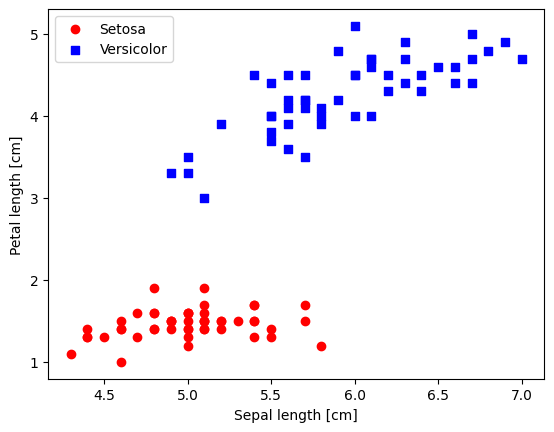

In [4]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0 ,1)

X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'b', marker = 's', label = 'Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

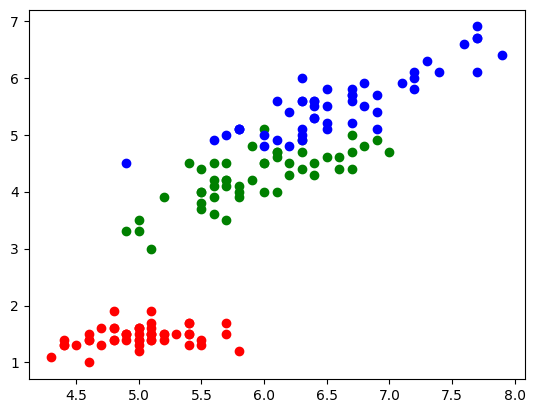

In [5]:
plt.scatter(df.iloc[0:50, 0].values, df.iloc[0:50, 2].values, color = 'r')
plt.scatter(df.iloc[50:100, 0].values, df.iloc[50:100, 2].values, color = 'g')
plt.scatter(df.iloc[100:149, 0].values, df.iloc[100:149, 2].values, color= 'b')
plt.show


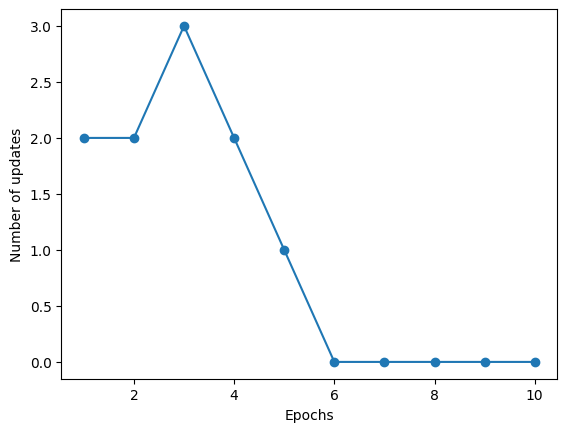

In [29]:
ppn = Perceptron(eta=0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, resolution = 0.02):
    markers = ('o','s','^','v','<')
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
    xx1, xx2= np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = colors[idx],
                    marker = markers[idx], label = f'Class {cl}',
                    edgecolor='black')

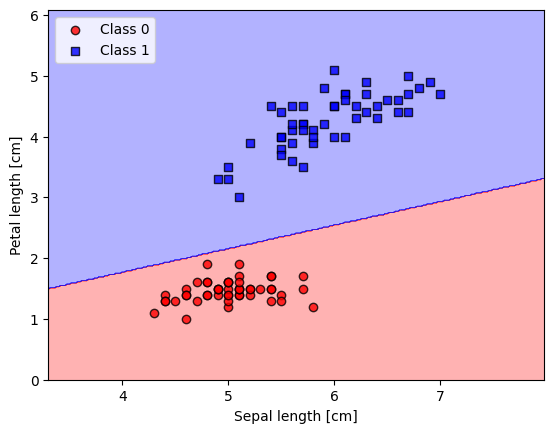

In [52]:
plot_decision_region(X, y, classifier = ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

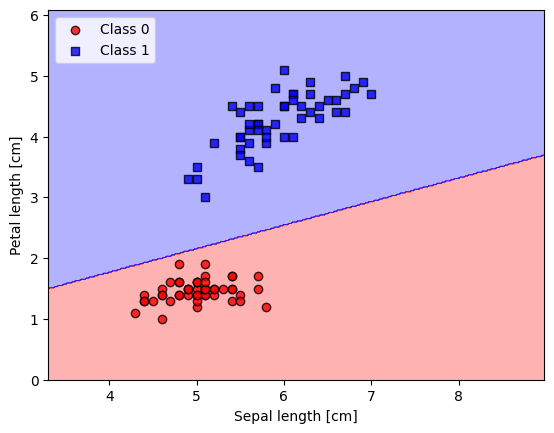

In [56]:
plot_decision_region(X, y, classifier = ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()